## A few examples

In these notes we will use a few simple examples to illustrate 
how to use the bootstrap in practice to construct confidence intervals for
a  "parameter" of an underlying and unknown distribution. These
first examples are very simple and only meant to "fix ideas" about
how the use of bootstrap looks outside the blackboard. Furthermore, 
in these synthetic examples we actually know the true distribution 
that generated the sample (and thus,
we also know the value of the parameter of interest). This will 
allow us to assess
the level of success of this inferential approach. 

In these examples we will only use the simplest bootstrap 
percentile method to construct confidence intervals. 

### Example 1 - Estimate the square root of the expected value

Consider a sample $X_1$, \ldots, $X_n$ from an unknown distribution $F$.
We assume that the mean $\mu = E_F(X)$ exists and are interested in
building an approximate 95\% confidence interval for its square
root: $\theta = \sqrt{\mu}$. 

Here we first generate a sample of size $n = 30$.

In [22]:
n <- 30
x <- rexp(n, rate=4)

Note that for these data, $\theta = 1/2$. A natural estimator 
for $\sqrt{\mu}$ is the square root of the sample mean
(e.g. this is the MLE of $\theta$):

In [23]:
( t0 <- sqrt(mean(x)) )

[1] 0.5635678

We will not estimate the distribution of $\sqrt{ \bar{X}_n}$
using the bootstrap. For this, we sample a large number 
$M = 5000$ of samples of size $n = 30$ from 
the empirical distribution $\hat{F}_n$. As we discussed 
in class, drawing a sample from the empirical distribution
is equivalent to drawing $n$ independent observations 
from the set $\left\{ X_1, \ldots, X_n \right\}$
with replacement. In `R` we can do this by simply
drawing a sample of the indices, i.e. we 
draw $n$ points (with replacement) from the set
$\left\{1, 2, \ldots, n \right\}$ and re-compute
the estimator with the corresponding points in the sample. 
Note that bootstrap samples may (and typically do) contain
repeated observations (even if the "original" sample does not). 

Here is one bootstrap sample, and its corresponding 
re-computed statistic:

In [24]:
bb <- sample.int(n, repl=TRUE)
sort(bb)

[1]  1  1  3  3  4  4  6  6  7  7  8 10 12 12 12 14 14 15 17 19 20 20 22 23 24
[26] 25 25 27 28 29

Here are the correponding observations

In [25]:
x[bb]

[1] 0.10332949 0.09063339 0.55358606 0.74842868 0.33460115 0.73611445
 [7] 0.65425786 0.35023140 0.10353510 0.12299136 0.05779662 0.33460115
[13] 0.70047465 0.05779662 0.22725393 0.10033077 0.06368634 0.07854812
[19] 0.06368634 0.70047465 0.09063339 0.73611445 0.71570137 0.12299136
[25] 0.73611445 0.30768866 0.08730666 0.71570137 0.45538969 0.65425786

and the associated estimator

In [26]:
sqrt(mean(x[bb]))

[1] 0.6001182

We now do this $M = 5000$ times, and collect all the recomputed
estimators in a vector. Note that there are more efficient ways 
of doing these calculations, but here I am giving preference to
transparency over computational efficiency.

In [27]:
M <- 5000
rho <- vector('numeric', M)
for(j in 1:M) {
  bb <- sample.int(n, repl=TRUE)
  # bb <- sample(1:n, repl=TRUE)
  rho[j] <- sqrt(mean(x[bb]))
}

We can look at a histogram and boxplot of the recomputed
estimators. These are bootstrap estimators of the true
sampling distribution of $\hat{\theta}_n = \sqrt{ \bar{X}_n }$:

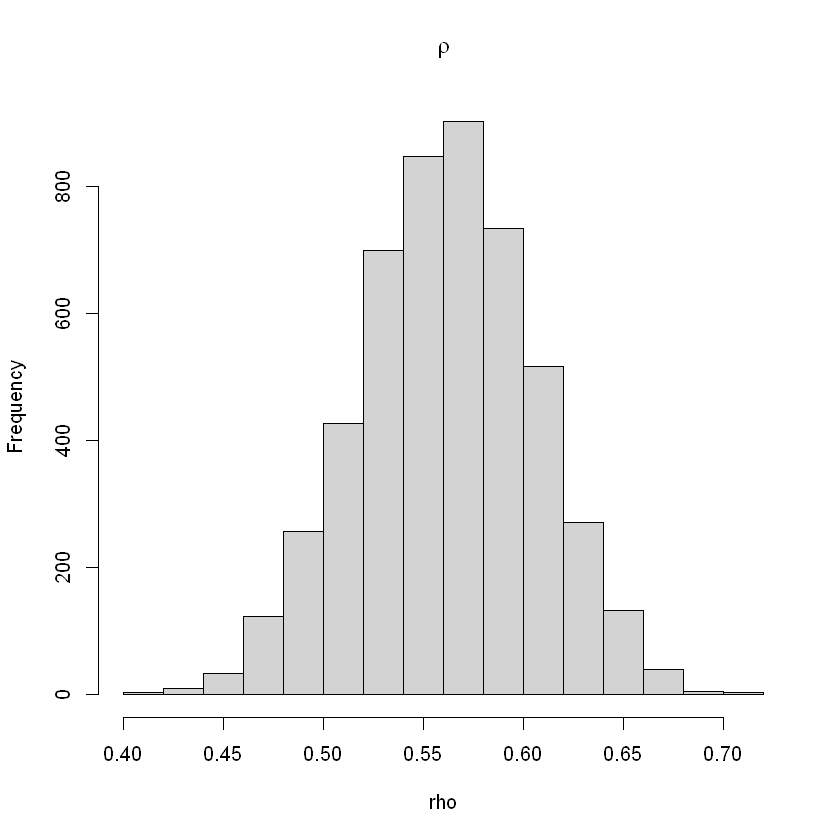

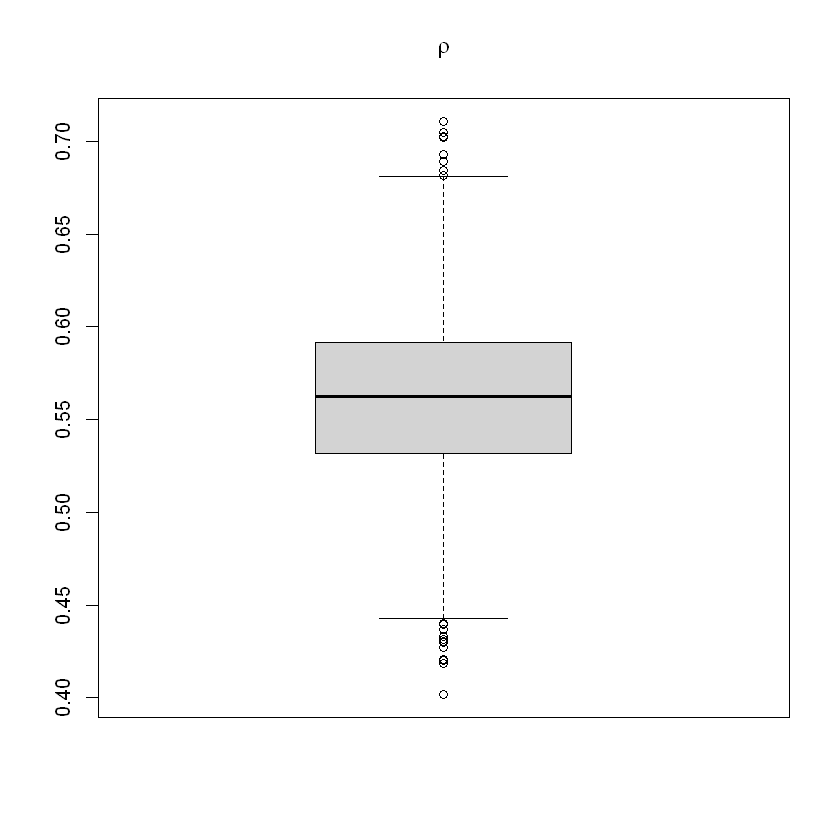

In [28]:
hist(rho, main=expression(rho))
boxplot(rho, main=expression(rho))

We now use the quantiles from the centered bootstrap 
distribution to build an approximate 95\% confidence
interval for $\theta = \sqrt{\mu}$:

In [29]:
lo0 <- t0 - quantile(rho - t0, .975)
up0 <- t0 - quantile(rho - t0, .025)
lo4 <- quantile(rho, .025)
up4 <- quantile(rho, .975)
rbind(c(lo=lo0, up=up0), c(lo=lo4, up=up4))

lo.97.5%,up.2.5%
0.4818190,0.6527454
0.4743902,0.6453167


Alternatively, we can use the CLT and the "delta" method
to derive a asymptotic CI which yields:

In [30]:
lo1 <- t0 - qnorm(.975)*sd(x)/2/mean(x)/sqrt(n)
up1 <- t0 + qnorm(.975)*sd(x)/2/mean(x)/sqrt(n)
as.numeric(c(lo=lo1, up=up1))
lo11 <- t0 - qnorm(.975)*sd(rho)
up11 <- t0 + qnorm(.975)*sd(rho)
rbind(c(lo=lo1, up=up1),
     c(lo=lo11, up=up11))

[1] 0.4093095 0.7178262

lo,up
0.4093095,0.7178262
0.4776933,0.6494424


Discuss.
<!-- We can compare it with the previous one -->
<!-- ```{r ex1.4} -->
<!-- ( rbind(c(lo=lo0, up=up0), -->
<!--       c(lo=lo1, up=up1)) ) -->
<!-- ``` -->
<!-- and note that the bootstrap one is shorter.  -->


### Example 2 - Estimate the expected value of the square root 

In this example, we have a sample $X_1, \ldots, X_n$ and are
interested in making inference on $\theta = E_F[ \sqrt{X} ]$. 

Here again we will generate the sample ourselves, so 
we will know the actual true value of $\theta$. 
We use  $X \sim \chi^2_1$, and thus $\sqrt{X} \sim |Z|$,
the absolute value of a standard normal 
random variable $Z \sim {\cal N}(0,1)$. Hence, 
$\theta = E[ |Z| ] = \sqrt{2/\pi} = 0.7978846$. 

As before, first we generate a sample:

In [10]:
set.seed(123456)
n <- 30
x <- rchisq(n, df=1)

A natural estimator for $\theta$ is $(1/n) \sum_{i=1}^n \sqrt{X}_i$:

In [11]:
(t0 <- mean(sqrt(x)))

[1] 0.9336014

Similarly to what we did above, we use $M = 5000$ 
bootstrap samples to estimate the sampling distribution of 
$\hat{\theta}_n = (1/n) \sum_{i=1}^n \sqrt{X}_i$:

In [12]:
M <- 5000
rho <- vector('numeric', M)
for(j in 1:M) {
  bb <- sample.int(n, repl=TRUE)
  rho[j] <- mean(sqrt(x[bb]))
}

We now  build an
approximate 95\% confidence interval for $\theta$
using the estimated quantiles of the sampling distribution
of our estimator:

In [13]:
lo0 <- t0 - quantile(rho - t0, .975)
up0 <- t0 - quantile(rho - t0, .025)
lo1 <- quantile(rho, .025)
up1 <- quantile(rho, .975)
rbind(c(lo=lo0, up=up0), c(lo=lo1, up=up1))

lo.97.5%,up.2.5%
0.6870952,1.164611
0.7025918,1.180108


Can you think of another method to build an
approximate CI for $E[ \sqrt{X} ]$? 


### Example 3 - The bootstrap's automatic transformation

This example illustrates an important property of the
simple bootstrap percentile confidence intervals.
Given a sample $X_1, \ldots, X_n$ we are interested
in $\theta = e^\mu$ where $\mu = E(X)$. 
First, lets  generate a small sample:

In [14]:
set.seed(123)
n <- 20
x <- rnorm(n)

The MLE estimator is $\hat{\theta}_n = e^{\bar{X}_n}$:

In [15]:
(t0 <- exp(mean(x)))

[1] 1.152143

Use bootstrap to estimate quantiles of the
statistic of interest

In [16]:
M <- 5000
rho <- vector('numeric', M)
for(j in 1:M) {
  bb <- sample.int(n, repl=TRUE)
  rho[j] <- exp(mean(x[bb]))
}

Now use  the estimated quantiles to build an
approximate 95\% confidence interval:

In [17]:
lo1 <- quantile(rho, .025)
up1 <- quantile(rho, .975)
c(lo=lo1, up=up1)

lo.2.5%  up.97.5% 
0.7593721 1.7175792

Compare this with a CLT based CI:

In [18]:
c(lo=t0 - qnorm(.975)*sd(rho), 
  up=t0 + qnorm(.975)*sd(rho))

lo        up 
0.6703665 1.6339198

Note that the distribution of our estimator
is quite asymmetric:

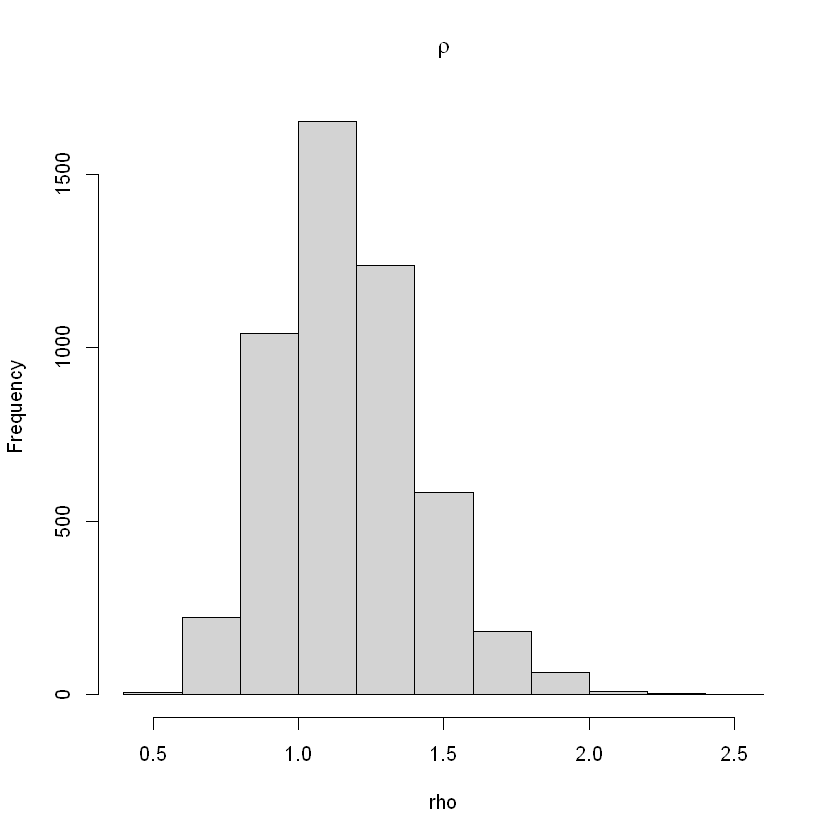

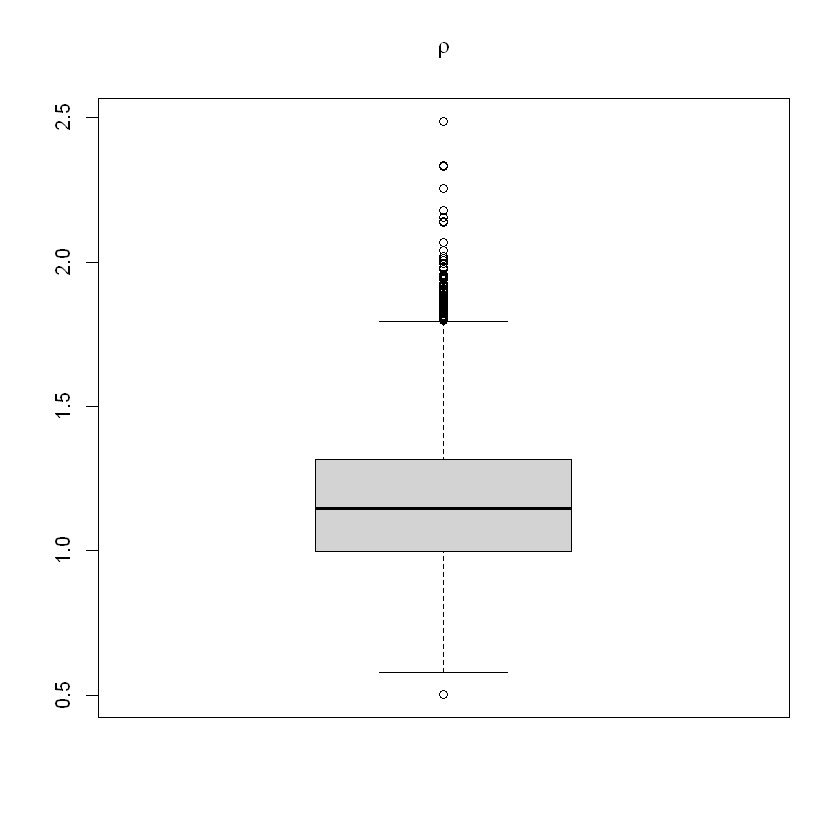

In [19]:
hist(rho, main=expression(rho))
boxplot(rho, main=expression(rho))

So it should not a surprise that these two confidence
intervals differ from each other. However, 
we now that if we transform our estimator with `log`,
then, the distribution should be quite symmetric,
and we expect both CIs (bootstrap and "normal")
to be closer to each other. 
Let us verify this in this example.

In [20]:
t0 <- mean(x)
M <- 5000
rho <- vector('numeric', M)
for(j in 1:M) {
  bb <- sample.int(n, repl=TRUE)
  rho[j] <- mean(x[bb])
}
lo1.log <- quantile(rho, .025)
up1.log <- quantile(rho, .975)
lo2.log <- t0 - qnorm(.975)*sd(rho)
up2.log <- t0 + qnorm(.975)*sd(rho)
rbind(c(lo=lo1.log, up=up1.log),
      c(lo=lo2.log, up=up2.log))

lo.2.5%,up.97.5%
-0.2723530,0.5556346
-0.2707307,0.5539783


Note that now the two CIs are fairly similar.
But also note that if we transform 
these back to the `exp` scale, 
they all resemble the one we obtained with 
the bootstrap percentile method:

In [21]:
rbind(BootLog=c(lo=exp(lo1.log), up=exp(up1.log)),
      GausLog=c(lo=exp(lo2.log), up=exp(up2.log)),
      Boot = c(lo=lo1, up=up1))

,lo.2.5%,up.97.5%
BootLog,0.7615854,1.743047
GausLog,0.7628219,1.740162
Boot,0.7593721,1.717579


In other words, the simple percentile bootstrap
method behaved as if it knew which transformation
to apply to obtain symmetry, and then transformed
the quantiles back. We will discuss this further 
in class.